In [1]:
#FOR DATA MANIPULATION
import pandas as pd
import numpy as np

#FOR VISUALISATION
from matplotlib import pyplot as plt
import seaborn as sns

#FOR CLASSIFICATION
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm

#FOR METRICS
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### ESCOLHA UMA BASE DE DADOS COM AO MENOS 4 FEATURES E 2 (APENAS) RÓTULOS

In [2]:
#IMPORT DATAFRAME

df_breast_cancer = pd.read_csv('./breast_cancer.csv')
df_breast_cancer.drop(columns='id', inplace=True)


### 1. Explique a motivação do uso da base

A escolha da base se deu pelo fato de atender os requisitos do exercicio proposto e trazer consigo uma aplicação pratica muito interessante. A base contém 32 colunas, sendo uma delas o rótulos, e 569 linhas de dados. Cada coluna representa um aspecto das condições anatomicas, como tamanho do seu raio, perimetro e área, e aspecto visual, de um nódulo no seios de uma mulher. Com base nessas informações, o objetivo do dataset é categorizar entre nódulo benigno e maligno.

### 2. Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

Todas as variaveis são continuas, e as médias e desvios padrões estão representados na tabela abaixo

In [10]:
df_breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### 3a. Em relação à base escolhida, Você irá comparar alguns modelos para prever as classes. Descreva como a validação cruzada pode ser usada para comparar modelos de maneira justa. Descreva o procedimento e como a métrica final é calculada.

A validação cruzada divide o dataset em k subdatasets, como se fossem pequenas caixas. 
Levando em consideração k=10, nós dividimos o dataset em 10 pequenas caixas. Sendo assim, nós treinamos o modelo de classificação utilizando uma dessas caixas para teste e as demais para treinos. Por consequência treinamos 10 modelos diferentes, cada modelo terá utilizado uma dessas caixas como teste e as demais para treino fazendo com que, em algum momento, todos os dados foram utilizados para treino e teste. 
Por fim, pegamos as avaliações de cada um dos modelos e tiramos a media + o desvio padrão e assim podemos determinar a capacidade de generalização que podemos alcançar com o método de classificação e o dataset.

### 3b. Em relação à base escolhida, A base se encontra com as classes balanceadas? Cite uma maneira de resolver no caso das classes estarem desbalanceadas.

<Axes: xlabel='diagnosis', ylabel='Count'>

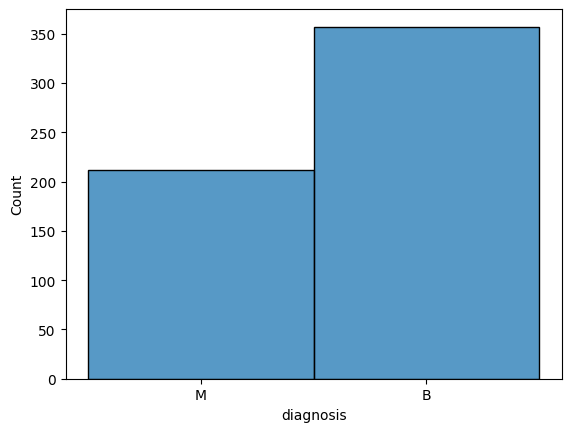

In [12]:
sns.histplot(data=df_breast_cancer, x='diagnosis')

As classes estão desbalanceadas. Para resolver esse problema, podemos usar o metodo de class weigths ou smote. Entretanto, o desbalanceamento não é muito acentuado, podemos tentar treinar os modelos dessa forma e, se ele não convergir bem podemos utilizar uma das estratégias.

### 4. Qual a diferença entre uma regressão linear e a regressão logística?

Regressão Linear e Logistica são dois tipos diferentes de modelos de analise de dados. A regressão linear é direcionada a dados continuos, em que um intervalo de valores está bem definido. Podemos usar regressão linear, por exemplo, para prever preços de imoveis dado o número de quartos, localização, area construida, etc. A regressão logistica esta associada a analise de dados binária, em que sua classe de interesse se apresenta em 1 ou 0. Podemos usar a regressão logistica para prever o tipo de nodulo, por exemplo, se ele é benigno ou maligno. Outra diferença importante é que a regressão linear utiliza uma equação linear para ser definida, enquanto a regressão logistica utiliza uma função logistica.

### 5a. Com a base escolhida, descreva as etapas necessárias para criar um modelo de classificação eficiente.

- 1º Definir o problema a ser explorado, entender as variaveis envolvidas, o que é entrada e o que queremos na saída
- 2º Analise exploratoria dos dados, verificando se existem dados nulos no dataset, como os dados estão escalados, como se apresentam e o que querem dizer, etc.
- 3º Preparar os dados para a modelagem, fazendo a normalização e os tratamentos necessários.
- 4º Definir uma gama de modelos que podem ajudar a resolver o problema proposto.
- 5º Dividir o conjunto de dados afim de testar o modelo, a sua performance e sua avaliação.
- 6º Treinar os modelos escolhidos ajustando os hiperparametros
- 7º Avaliar o modelo
- 8º Fazer ajustes no modelo
- 9º Avaliar o modelo final

Os passos 6, 7, 8 e 9 podem ser combinados, utilizando tecnicas de validação cruzada, gridsearch e avaliação em laço.

### 5b. Com a base escolhida, treine um modelo de regressão logística para realizar a classificação. Qual a acurácia, a precisão, a recall e o f1-score do modelo.?Treine um modelo de árvores de decisão para realizar a classificação. Qual a acurácia, a precisão, a recall e o f1-score do modelo?

- Separando os dados de entrada e os de saída.

In [3]:
X = df_breast_cancer.drop(columns='diagnosis').copy()
Y = df_breast_cancer[['diagnosis']].copy()

- Codificando o Y que esta em M = Maligno e B = Benigno para 1 ou 0

In [4]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y_df = pd.DataFrame(Y, columns=['diagnosis'])

c:\Users\andre\AppData\Local\pypoetry\Cache\virtualenvs\projeto-classificacao-zrn0zDE8-py3.10\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- Analise Exploratória

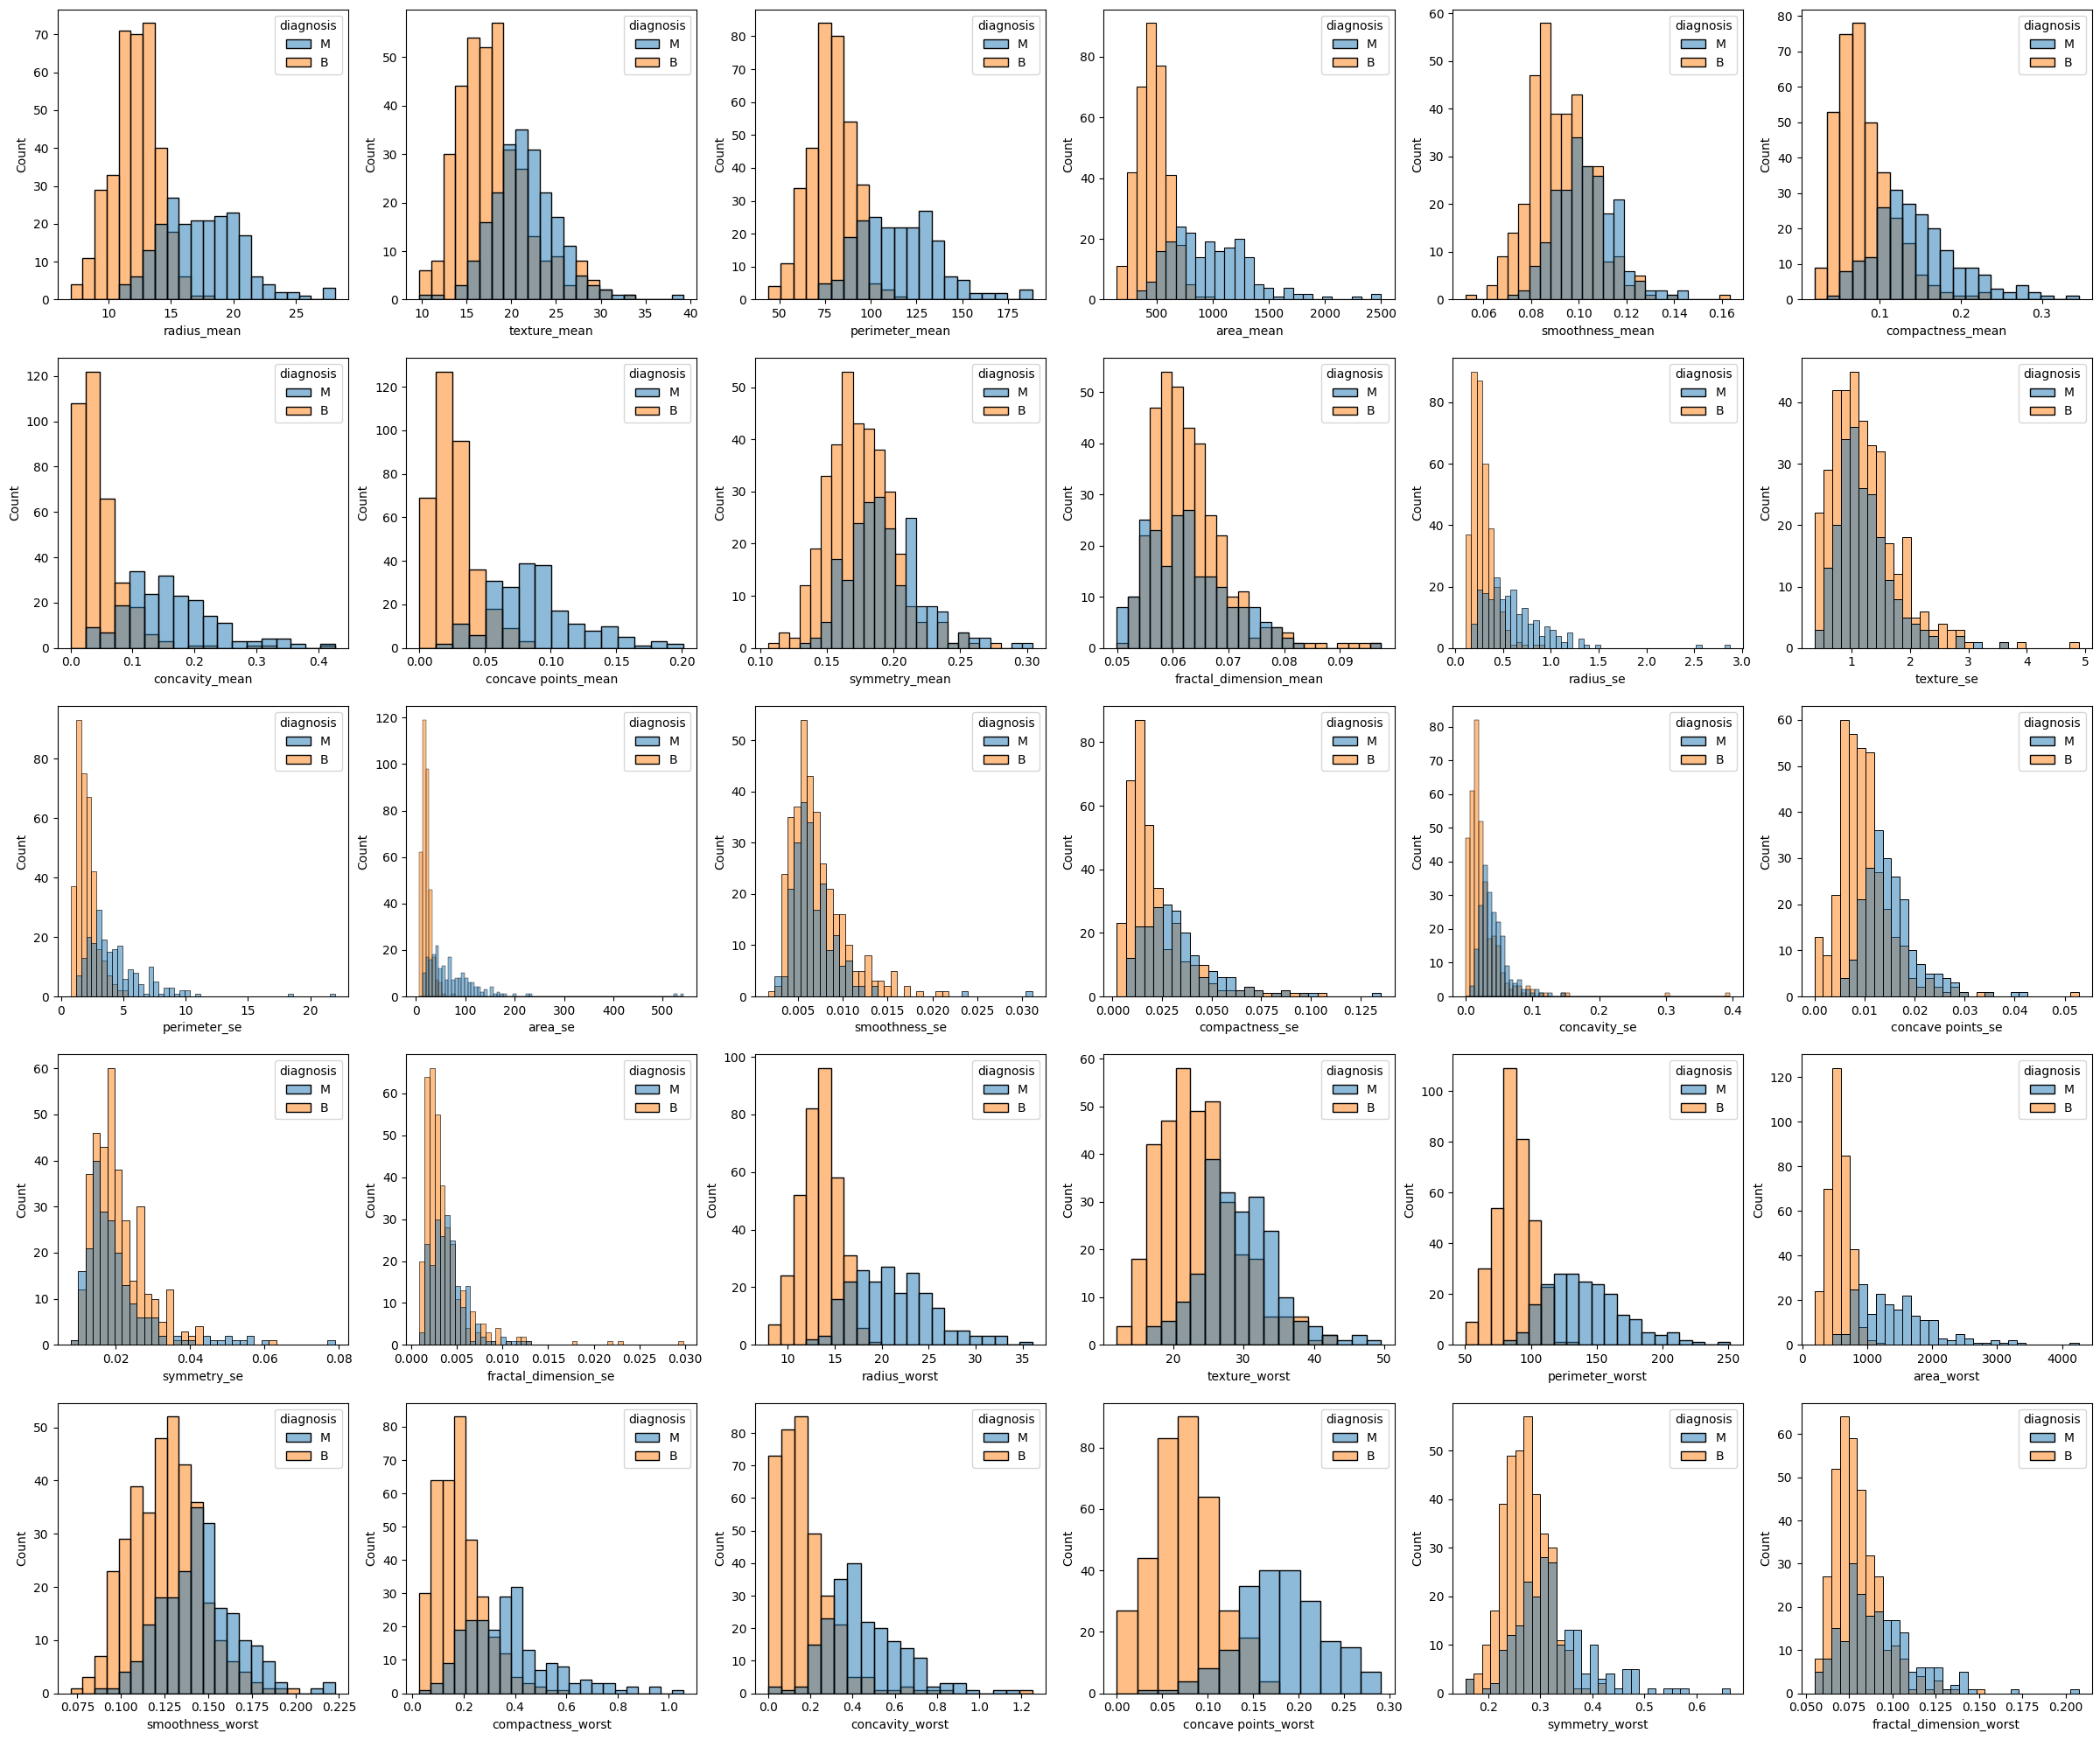

In [14]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6),
        (ax7, ax8, ax9, ax10, ax11, ax12),
        (ax13, ax14, ax15, ax16, ax17, ax18),
        (ax19, ax20, ax21, ax22, ax23, ax24),
        (ax25, ax26, ax27, ax28, ax29, ax30)) = plt.subplots(5,6,figsize=(30,25))

columns_names = df_breast_cancer.drop(columns='diagnosis').columns
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14,
        ax15, ax16, ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24, ax25, ax26, ax27,
        ax28, ax29, ax30]
suport = 0

for i in columns_names:
        sns.histplot(data=df_breast_cancer, x=i, hue='diagnosis', ax=ax_list[suport])
        suport = suport + 1

Os dados estão em escalas distintas, será necessário executar a normalização.

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

- Treinando Regrssão Logistica

In [6]:
kf = KFold(n_splits=10, random_state=19, shuffle=True)
lr = LogisticRegression(max_iter=7000, solver = 'saga')
parameters = {
    'penalty':['l1','l2'],
    'C':[1,2,5,10,20]
}

grid_model = GridSearchCV(lr, parameters, cv=kf, error_score='raise')
grid_model.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=19, shuffle=True),
             error_score='raise',
             estimator=LogisticRegression(max_iter=7000, solver='saga'),
             param_grid={'C': [1, 2, 5, 10, 20], 'penalty': ['l1', 'l2']})

In [7]:
grid_model.best_estimator_

LogisticRegression(C=20, max_iter=7000, solver='saga')

In [8]:
sk_folds = StratifiedKFold(n_splits=10)
sk_folds.get_n_splits(X, Y)
best_lr = LogisticRegression(C=20, max_iter=7000, penalty='l1', solver='saga')
acuracias = []
precisoes = []
f1_scores = []
recalls = []

for train_index, test_index in sk_folds.split(X, Y_df):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    best_lr.fit(X_train, y_train)

    y_pred = best_lr.predict(X_test)
    acuracia = best_lr.score(X_test, y_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    
    acuracias.append(acuracia)
    precisoes.append(precision)
    f1_scores.append(f1_score)
    recalls.append(recall)

result_df = pd.DataFrame({
    'Acurácia': acuracias,
    'Precisão': precisoes,
    'Recall': recalls,
    'F1-Score': f1_scores
})


In [9]:
result_df.mean()

Acurácia    0.971898
Precisão    0.964556
Recall      0.962338
F1-Score    0.962711
dtype: float64

In [10]:
result_df.std()

Acurácia    0.020575
Precisão    0.044381
Recall      0.029978
F1-Score    0.026043
dtype: float64

Para o modelo de regressão logistica, os valores são:
- Acuracia: 97,18% +/- 2%
- Precisão: 96,45% +/- 4%
- Recall: 96,23% +/- 3%
- F1-Score: 96,27% +/- 2%

In [11]:
dt = DecisionTreeClassifier()
parameters_dt = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random']

}
grid_model_dt = GridSearchCV(dt, parameters_dt, cv=kf, error_score='raise')
grid_model_dt.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=10, random_state=19, shuffle=True),
             error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [12]:
grid_model_dt.best_estimator_

DecisionTreeClassifier(splitter='random')

In [13]:
best_dt = DecisionTreeClassifier(criterion='log_loss', splitter='random')
acuracias_dt = []
precisoes_dt = []
f1_scores_dt = []
recalls_dt = []

for train_index, test_index in sk_folds.split(X, Y_df):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    best_dt.fit(X_train, y_train)

    y_pred_dt = best_dt.predict(X_test)
    acuracia_dt = best_dt.score(X_test, y_test)
    report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
    precision_dt = report_dt['1']['precision']
    recall_dt = report_dt['1']['recall']
    f1_score_dt = report_dt['1']['f1-score']
    
    acuracias_dt.append(acuracia_dt)
    precisoes_dt.append(precision_dt)
    f1_scores_dt.append(f1_score_dt)
    recalls_dt.append(recall_dt)

result_df_dt = pd.DataFrame({
    'Acurácia': acuracias_dt,
    'Precisão': precisoes_dt,
    'Recall': recalls_dt,
    'F1-Score': f1_scores_dt
})


In [26]:
result_df_dt = result_df_dt.rename(columns={'Acurácia':'Acurácia_dt', 
                                            'Precisão':'Precisão_dt',
                                            'Recall':'Recall_dt',
                                            'F1-Score':'F1-Score_dt'})

In [27]:
result_df_dt

,Acurácia_dt,Precisão_dt,Recall_dt,F1-Score_dt
0,0.929825,0.875000,0.954545,0.913043
1,0.912281,0.947368,0.818182,0.878049
2,0.912281,0.863636,0.904762,0.883721
3,0.912281,0.944444,0.809524,0.871795
4,0.964912,0.952381,0.952381,0.952381
5,0.929825,0.904762,0.904762,0.904762
6,0.894737,0.826087,0.904762,0.863636
7,1.000000,1.000000,1.000000,1.000000
8,0.982456,0.954545,1.000000,0.976744
9,0.875000,0.850000,0.809524,0.829268


In [15]:
result_df_dt.mean()

Acurácia    0.931360
Precisão    0.911822
Recall      0.905844
F1-Score    0.907340
dtype: float64

In [16]:
result_df_dt.std()

Acurácia    0.039528
Precisão    0.056247
Recall      0.073418
F1-Score    0.053909
dtype: float64

Para arvore de decisão:
- Acuracia: 93,67% +/- 3%
- Precisão: 91,7% +/- 5%
- Recall: 91,51% +/- 5%
- F1-Score: 91,52% +/- 4%

### 5c. Com a base escolhida, treine um modelo de SVM para realizar a classificação. Qual a acurácia, a precisão, a recall e o f1-score do modelo?

In [17]:
svc = svm.SVC()
parameters_svc = {
    'C':[1,2,10,20],
    'kernel':['linear','poly','rbf','sigmoid'],
    'degree':[1,2,10,20],
    'gamma':['scale','auto']
}
grid_model_svc = GridSearchCV(svc, parameters_svc, cv=kf, error_score='raise')
grid_model_svc.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=10, random_state=19, shuffle=True),
             error_score='raise', estimator=SVC(),
             param_grid={'C': [1, 2, 10, 20], 'degree': [1, 2, 10, 20],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [18]:
grid_model_svc.best_estimator_

SVC(C=2, degree=1, kernel='poly')

In [19]:
best_svc = svm.SVC(C=2, degree=1, kernel='poly')
acuracias_svc = []
precisoes_svc = []
f1_scores_svc = []
recalls_svc = []

for train_index, test_index in sk_folds.split(X, Y_df):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    best_svc.fit(X_train, y_train)

    y_pred_svc = best_svc.predict(X_test)
    acuracia_svc = best_svc.score(X_test, y_test)
    report_svc = classification_report(y_test, y_pred_svc, output_dict=True)
    precision_svc = report_svc['1']['precision']
    recall_svc = report_svc['1']['recall']
    f1_score_svc = report_svc['1']['f1-score']
    
    acuracias_svc.append(acuracia_svc)
    precisoes_svc.append(precision_svc)
    f1_scores_svc.append(f1_score_svc)
    recalls_svc.append(recall_svc)

result_df_svc = pd.DataFrame({
    'Acurácia': acuracias_svc,
    'Precisão': precisoes_svc,
    'Recall': recalls_svc,
    'F1-Score': f1_scores_svc
})


In [28]:
result_df_svc = result_df_svc.rename(columns={'Acurácia':'Acurácia_svc', 
                                            'Precisão':'Precisão_svc',
                                            'Recall':'Recall_svc',
                                            'F1-Score':'F1-Score_svc'})

In [29]:
result_df_svc

,Acurácia_svc,Precisão_svc,Recall_svc,F1-Score_svc
0,0.982456,0.956522,1.000000,0.977778
1,0.964912,1.000000,0.909091,0.952381
2,0.982456,1.000000,0.952381,0.975610
3,0.982456,1.000000,0.952381,0.975610
4,1.000000,1.000000,1.000000,1.000000
5,0.964912,1.000000,0.904762,0.950000
6,0.929825,0.947368,0.857143,0.900000
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000,1.000000
9,0.964286,0.952381,0.952381,0.952381


In [21]:
result_df_svc.mean()

Acurácia    0.977130
Precisão    0.985627
Recall      0.952814
F1-Score    0.968376
dtype: float64

In [22]:
result_df_svc.std()

Acurácia    0.021999
Precisão    0.023243
Recall      0.049755
F1-Score    0.031123
dtype: float64

Para SVC:
- Acuracia: 97,71% +/- 2%
- Precisão: 98,56% +/- 2%
- Recall: 95,28% +/- 5%
- F1-Score: 96,83% +/- 3%

### 6. Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos e justifique

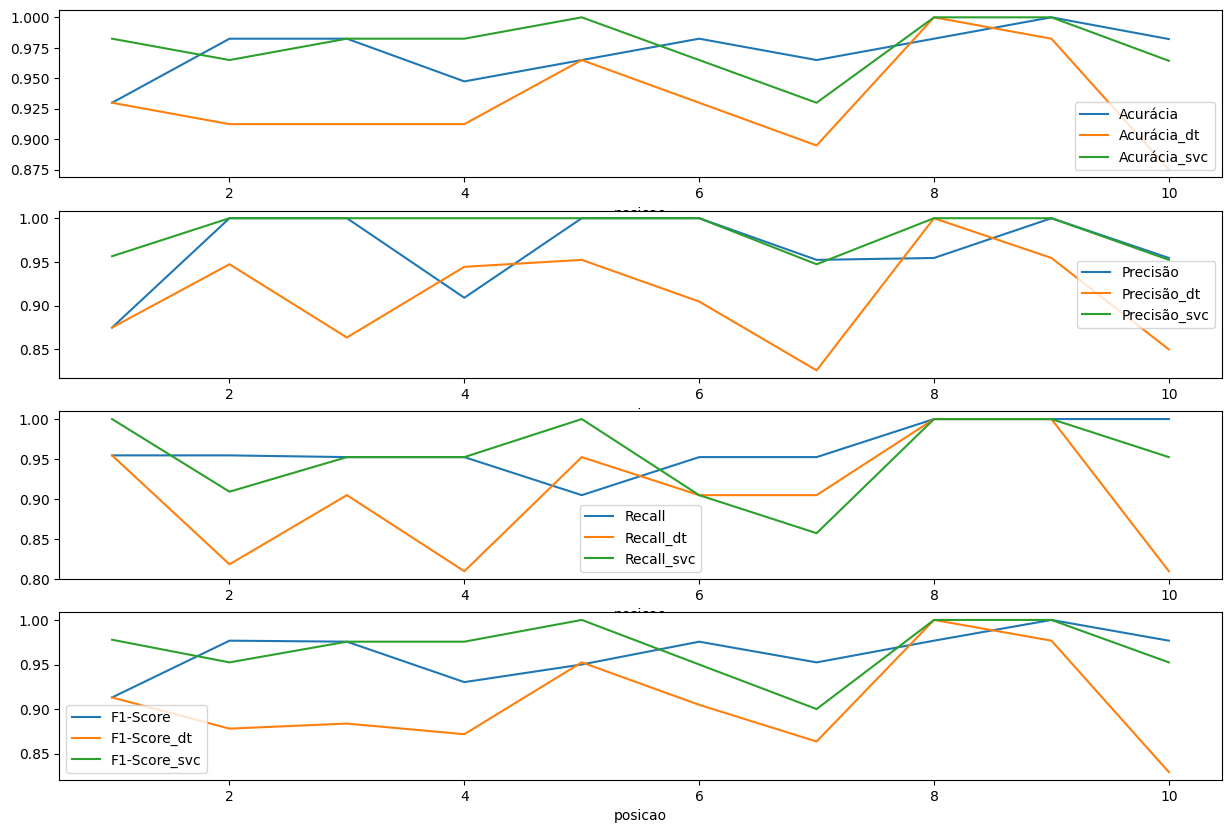

In [60]:
#PLOTANDO AS METRICAS ENCONTRADAS NA VALIDAÇÃO CRUZADA DOS MODELOS

result_all = pd.concat([result_df,result_df_dt,result_df_svc], axis=1)
result_all['posicao'] = range(1, 11)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15,10))

result_all.plot(kind = 'line', x='posicao', y=['Acurácia', 'Acurácia_dt','Acurácia_svc'], ax = ax1)
result_all.plot(kind = 'line', x='posicao', y=['Precisão', 'Precisão_dt','Precisão_svc'], ax = ax2)
result_all.plot(kind = 'line', x='posicao', y=['Recall', 'Recall_dt','Recall_svc'], ax = ax3)
result_all.plot(kind = 'line', x='posicao', y=['F1-Score', 'F1-Score_dt','F1-Score_svc'], ax = ax4)



plt.show()

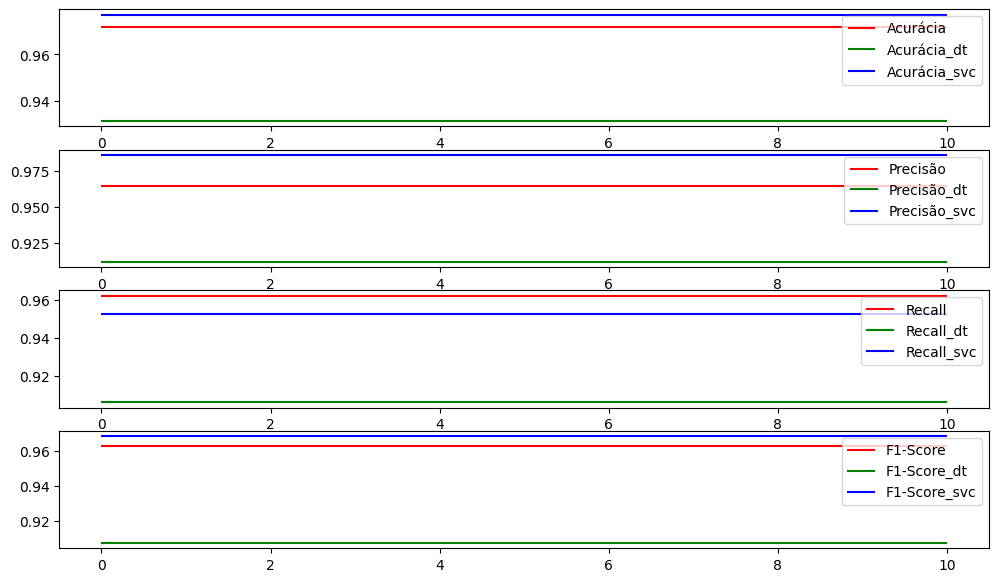

In [62]:
#PLOTANDO A MÉDIA DAS METRICAS ENCONTRADAS NA VALIDAÇÃO CRUZADA, AFIM DE COMPARAR OS RESULTADOS

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (12,7))

ax1.hlines(y = [result_all[['Acurácia']].mean()], xmin=0, xmax=10, colors='r', label= 'Acurácia')
ax1.hlines(y = [result_all[['Acurácia_dt']].mean()], xmin=0, xmax=10, colors='g', label= 'Acurácia_dt')
ax1.hlines(y = [result_all[['Acurácia_svc']].mean()], xmin=0, xmax=10, colors='b', label= 'Acurácia_svc')

ax2.hlines(y = [result_all[['Precisão']].mean()], xmin=0, xmax=10, colors='r', label= 'Precisão')
ax2.hlines(y = [result_all[['Precisão_dt']].mean()], xmin=0, xmax=10, colors='g', label= 'Precisão_dt')
ax2.hlines(y = [result_all[['Precisão_svc']].mean()], xmin=0, xmax=10, colors='b', label= 'Precisão_svc')

ax3.hlines(y = [result_all[['Recall']].mean()], xmin=0, xmax=10, colors='r', label= 'Recall')
ax3.hlines(y = [result_all[['Recall_dt']].mean()], xmin=0, xmax=10, colors='g', label= 'Recall_dt')
ax3.hlines(y = [result_all[['Recall_svc']].mean()], xmin=0, xmax=10, colors='b', label= 'Recall_svc')

ax4.hlines(y = [result_all[['F1-Score']].mean()], xmin=0, xmax=10, colors='r', label= 'F1-Score')
ax4.hlines(y = [result_all[['F1-Score_dt']].mean()], xmin=0, xmax=10, colors='g', label= 'F1-Score_dt')
ax4.hlines(y = [result_all[['F1-Score_svc']].mean()], xmin=0, xmax=10, colors='b', label= 'F1-Score_svc')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

Text(0.5, 1.0, 'svm.SVC')

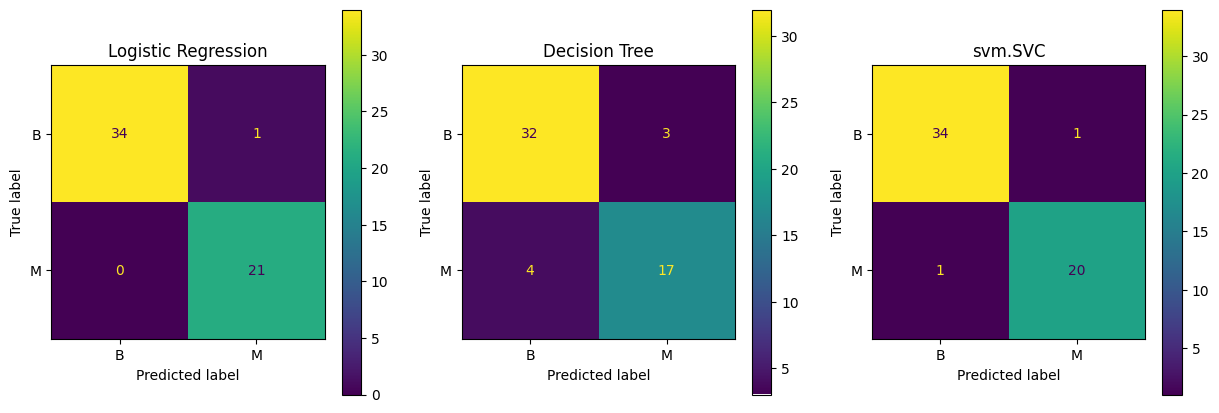

In [ ]:
#PLOTANDO A MATRIZ DE CONFUSÃO

conf = confusion_matrix(y_test, y_pred)
conf_dt = confusion_matrix(y_test, y_pred_dt)
conf_svc = confusion_matrix(y_test, y_pred_svc)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ConfusionMatrixDisplay(conf, display_labels= ['B','M']).plot(ax=ax1)
ConfusionMatrixDisplay(conf_dt, display_labels= ['B','M']).plot(ax=ax2)
ConfusionMatrixDisplay(conf_svc, display_labels= ['B','M']).plot(ax=ax3)

ax1.set_title('Logistic Regression')
ax2.set_title('Decision Tree')
ax3.set_title('svm.SVC')

- Dos 3 modelos, o que teve a pior performance foi o Decision Tree, no split de teste ele acertou a menor quantidade em relação aos outros dois, mesmo utilizando os melhores hiperparâmetros encontrados no GridSearch e na validação cruzada, a media das métricas foi a menor. 
- Os outros dois performaram bem, tendo como base os valores encontrados nas médias das metricas de validação e no split de teste esses modelos conseguiram acertar boa parte das classificações. 
- Entretanto, o modelo de SVC se saiu melhor nas medias da validação cruzada, sendo o melhor em Acurácia, Precisão e F1-Score, ja a regressão logistica só se sobressaiu na medida de Recall. 
- Por esses motivos, possivelmente, o modelo que apresentaria a melhor desenvoltura em produção seria o SVC.